In [323]:
import os, array
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [451]:
#importa dados como data frame, deleta colunas e duplicatas do mesmo

tabela = pd.read_csv("WorldCupMatches.csv", encoding='utf-8')
to_delete = ["Datetime","Stadium","City","Referee","Assistant 1", "Assistant 2","MatchID"]
tabela.drop_duplicates(inplace=True)
for i in to_delete:
    tabela.drop(i,axis=1,inplace=True)

#faz a limpeza/troca de nomes de times com erros
tabela["Home Team Name"] = tabela["Home Team Name"].str.replace('rn">', '', regex=True)
tabela["Away Team Name"] = tabela["Away Team Name"].str.replace('rn">', '', regex=True)

names_tobe_replaced = ["C�te d'Ivoire", "Germany FR", "German DR", "IR Iran", "Zaire", "Dutch East Indies","Republic of Ireland"]
names_to_replace = ["Côte d'Ivoire", "Germany", "Germany", "Iran", "Congo DR", "Indonesia", "Ireland"]

for i,j in zip(names_tobe_replaced, names_to_replace):
    tabela["Home Team Name"] = tabela["Home Team Name"].replace([i],[j])
    tabela["Away Team Name"] = tabela["Away Team Name"].replace([i],[j])

In [315]:
#mostra todos jogos do time em questão
#tabela[tabela['Home Team Name'].str.contains('Wales')]
#tabela[tabela['Away Team Name'].str.contains('Wales')]

<BarContainer object of 21 artists>

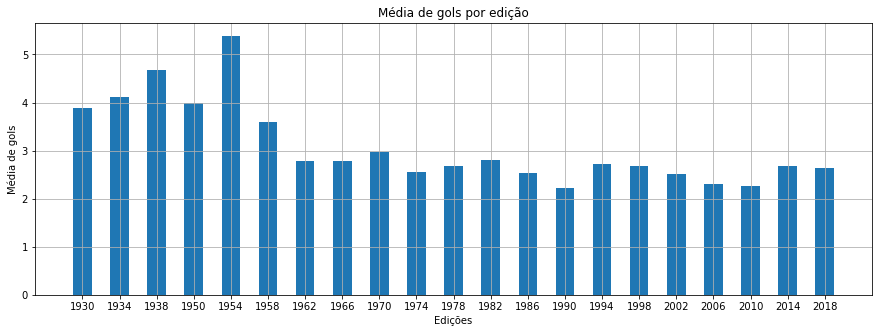

In [452]:
#vetor com edicoes da copa
anos = [1930, 1934, 1938, 1950, 1954, 1958, 1962, 1966, 1970, 1974,
         1978, 1982, 1986, 1990, 1994, 1998, 2002, 2006, 2010, 2014,
         2018]

#cria vetor com n de gols de x edicao
#cria vetor com n de partidas/edicao
n_gols_edicao, n_partidas_edicao = [], []
for ano in anos:
    k = 0
    k = sum(tabela['Home Team Goals'][tabela['Year'] == ano]) + sum(tabela['Away Team Goals'][tabela['Year'] == ano])
    n_gols_edicao.append(k)
    n_partidas_edicao.append(len(tabela[tabela['Year'] == ano]))
    
media_gols_edicao = [i / j for i, j in zip(n_gols_edicao, n_partidas_edicao)] #media de gols/edicao


plt.figure(figsize=(15,5))
plt.title("Média de gols por edição")
plt.xlabel("Edições")
plt.ylabel("Média de gols")
plt.grid()
plt.bar([str(ano) for ano in anos], media_gols_edicao,width =0.5)

In [453]:
# ordena e separa os times unicos
times = pd.DataFrame(tabela['Home Team Name'].append(tabela['Away Team Name'],ignore_index=True))
times = times[0].unique()
times = np.sort(times)

#vetor com total de gols de cada time 
total_gols_times = []
for time in times:
    tmp3 = sum(tabela['Home Team Goals'][tabela['Home Team Name'] == time]) + sum(tabela['Away Team Goals'][tabela['Away Team Name'] == time])
    total_gols_times.append(tmp3)

In [454]:
#cria data frame com times e gols de cada time
times_gols = pd.DataFrame([times, total_gols_times]).transpose()

#calcula a média de gols por time
media_gols_time = [100*i/sum(times_gols[1]) for i in total_gols_times]
porcentagem_gols_time = np.around(np.array(media_gols_time), 4)

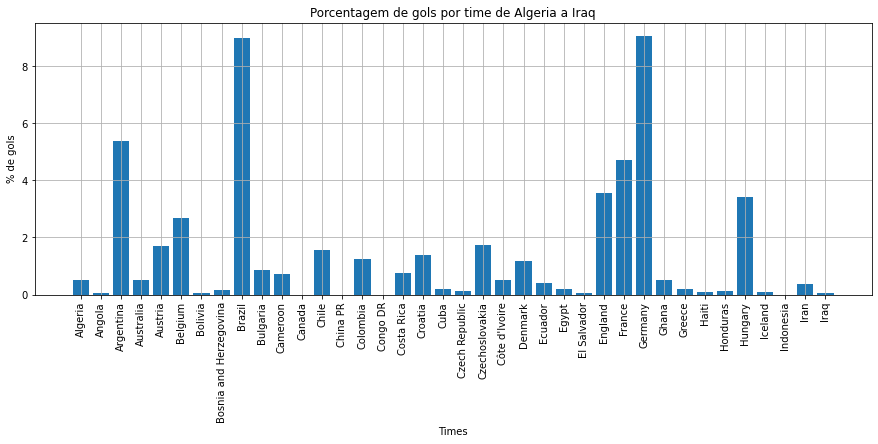

In [455]:
# plot de time por %de gols, parte1
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.bar(teams[0:38],media_gols_time[0:38])
plt.title('Porcentagem de gols por time de Algeria a Iraq')
plt.xlabel("Times")
plt.ylabel("% de gols")
plt.grid()
plt.show()

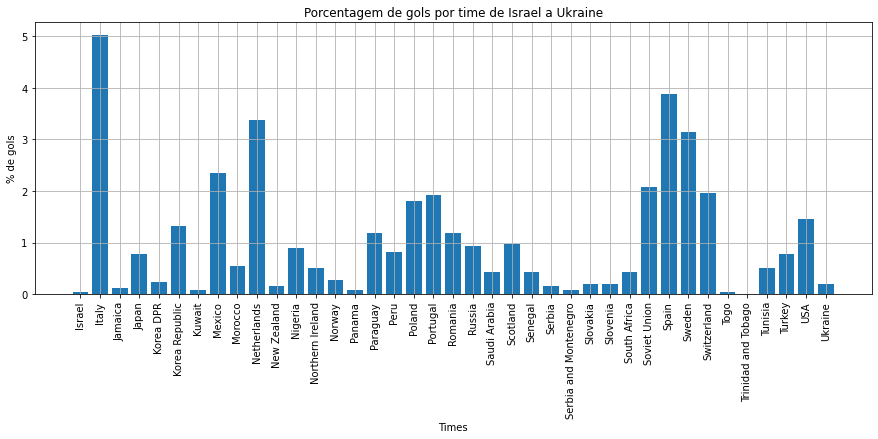

In [456]:
# plot de time por %de gols, parte2
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.bar(teams[39:78],tmp4[39:78])
plt.title('Porcentagem de gols por time de Israel a Ukraine')
plt.xlabel('Times')
plt.ylabel('% de gols')
plt.grid()
plt.show()

In [457]:
#calcula quantas vitorias, derrotas e empates cada time teve na competicao

home_win = tabela[tabela['Home Team Goals'] > tabela['Away Team Goals']]
away_win = tabela[tabela['Home Team Goals'] < tabela['Away Team Goals']]
home_loss = tabela[tabela['Home Team Goals'] < tabela['Away Team Goals']]
away_loss = tabela[tabela['Home Team Goals'] > tabela['Away Team Goals']]
draw = tabela[tabela['Home Team Goals'] == tabela['Away Team Goals']]
    
val1 = home_win["Home Team Name"].value_counts().reindex(tabela["Home Team Name"].unique(), fill_value=0)
val2 = away_win["Away Team Name"].value_counts().reindex(tabela["Away Team Name"].unique(), fill_value=0)
val3 = home_loss["Home Team Name"].value_counts().reindex(tabela["Home Team Name"].unique(), fill_value=0)
val4 = away_loss["Away Team Name"].value_counts().reindex(tabela["Away Team Name"].unique(), fill_value=0)
val5 = draw["Home Team Name"].value_counts().reindex(tabela["Home Team Name"].unique(), fill_value=0)
val6 = draw["Away Team Name"].value_counts().reindex(tabela["Away Team Name"].unique(), fill_value=0)

teams_win = val1.combine_first(val2) + val2.combine_first(val1)
teams_loss = val3.combine_first(val4) + val4.combine_first(val3)
teams_draw = val5.combine_first(val6) + val6.combine_first(val5)

win_loss_draw = pd.DataFrame(data=[teams_win, teams_loss, teams_draw])
win_loss_draw.rename(index={0:'win', 1:'loss', 2:'draw'}, inplace=True)
win_loss_draw = pd.DataFrame.transpose(win_loss_draw)

<BarContainer object of 9 artists>

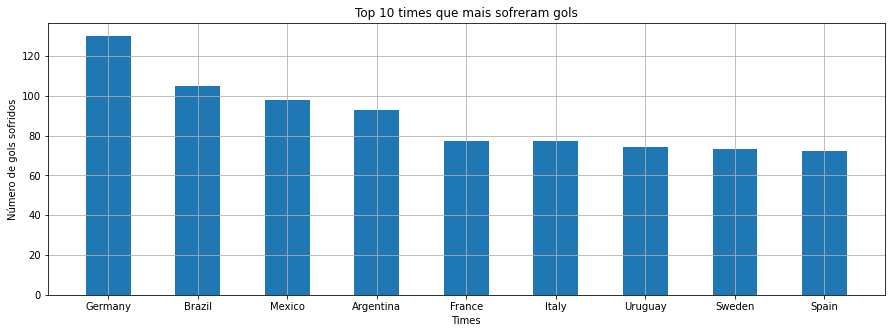

In [458]:
#media de gols sofridos/time

gols_sofridos_time = []
for time in times:
    tmp11 = sum(tabela[tabela['Home Team Name'].str.contains(time)]['Away Team Goals']) 
    tmp12 = sum(tabela[tabela['Away Team Name'].str.contains(time)]['Home Team Goals'])
    gols_sofridos_time.append(tmp11+tmp12)
    
gols_sofridos_time = pd.DataFrame(data = [times, gols_sofridos_time]).transpose()
gols_sofridos_time = gols_sofridos_time.sort_values(by = 1, ascending = False)

plt.figure(figsize=(15,5))
plt.title("Top 10 times que mais sofreram gols")
plt.xlabel("Times")
plt.ylabel("Número de gols sofridos")
plt.grid()
plt.bar(gols_sofridos_time[0:9][0],gols_sofridos_time[0:9][1],width =0.5)

<BarContainer object of 9 artists>

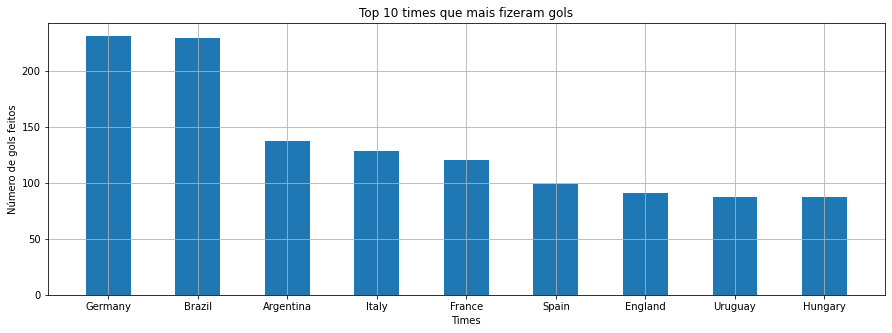

In [459]:
#grafico top10 gols por time
top10_gols = times_gols.sort_values(by = 1, ascending = False)

plt.figure(figsize=(15,5))
plt.title("Top 10 times que mais fizeram gols")
plt.xlabel("Times")
plt.ylabel("Número de gols feitos")
plt.grid()
plt.bar(top10_gols[0:9][0],top10_gols[0:9][1],width =0.5)

In [460]:
#descricao dos dados tabela
descricao_dados = tabela.describe().transpose()
descricao_dados = pd.DataFrame(data=[descricao_dados['mean'],descricao_dados['min'],descricao_dados['max']])
round(descricao_dados, 3)


,Year,Home Team Goals,Away Team Goals,Attendance
mean,1986.916,1.796,1.036,45036.087
min,1930.000,0.000,0.000,2000.000
max,2018.000,10.000,7.000,173850.000


<BarContainer object of 21 artists>

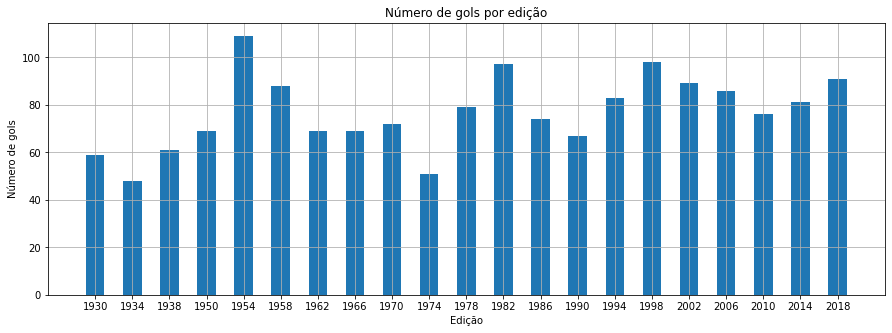

In [461]:
#grafico de gols por edicao
plt.figure(figsize=(15,5))
plt.grid()
plt.title('Número de gols por edição')
plt.xlabel('Edição')
plt.ylabel('Número de gols')
plt.bar([str(ano) for ano in anos], tmp1, width=0.5)

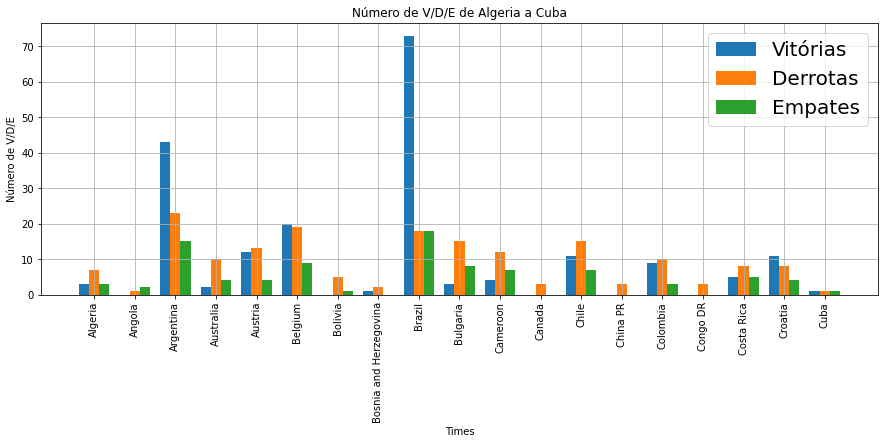

In [462]:
a, b, c = win_loss_draw['win'], win_loss_draw['loss'], win_loss_draw['draw']

#parte 1 gráfico de vit/der/emp 
plt.figure(figsize=(15,5))
X_axis = np.arange(len(teams[0:19]))
plt.xticks(X_axis, teams[0:19], rotation = 90)
plt.xlabel('Times')
plt.ylabel('Número de V/D/E')
plt.title('Número de V/D/E de Algeria a Cuba')
plt.bar(X_axis - 0.25, a[0:19], 0.25, label = 'Vitórias')
plt.bar(X_axis, b[0:19], 0.25, label = 'Derrotas')
plt.bar(X_axis + 0.25, c[0:19], 0.25, label = 'Empates')
plt.legend(prop={'size': 20})
plt.grid()
btm, tp = plt.ylim()

(0.0, 76.65)

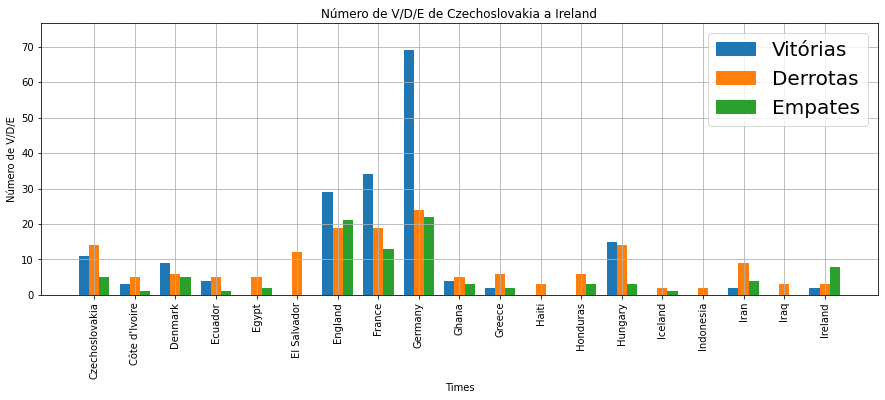

In [463]:
#parte 2 gráfico de vit/der/emp 
plt.figure(figsize=(15,5))
X_axis = np.arange(len(teams[20:39]))
plt.xticks(X_axis, teams[20:39], rotation = 90)
plt.xlabel('Times')
plt.ylabel('Número de V/D/E')
plt.title('Número de V/D/E de Czechoslovakia a Ireland')
plt.bar(X_axis - 0.25, a[20:39], 0.25, label = 'Vitórias')
plt.bar(X_axis, b[20:39], 0.25, label = 'Derrotas')
plt.bar(X_axis + 0.25, c[20:39], 0.25, label = 'Empates')
plt.legend(prop={'size': 20})
plt.grid()
plt.ylim(btm, tp)

(0.0, 76.65)

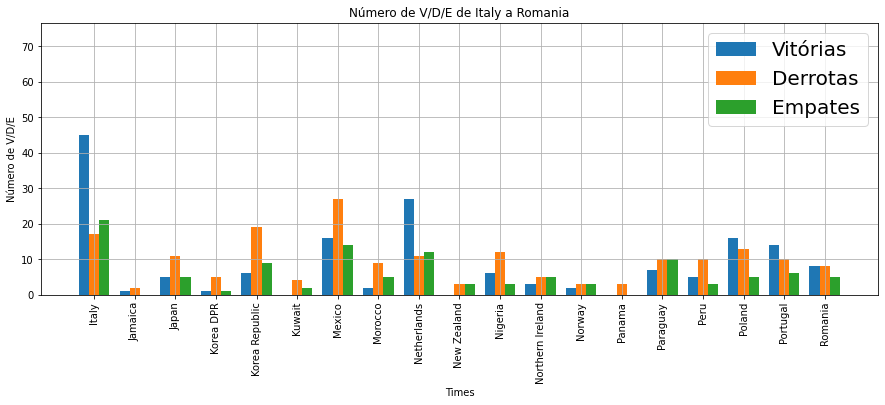

In [464]:
#parte 3 gráfico de vit/der/emp 
plt.figure(figsize=(15,5))
X_axis = np.arange(len(teams[40:59]))
plt.xticks(X_axis, teams[40:59], rotation = 90)
plt.xlabel('Times')
plt.ylabel('Número de V/D/E')
plt.title('Número de V/D/E de Italy a Romania')
plt.bar(X_axis - 0.25, a[40:59], 0.25, label = 'Vitórias')
plt.bar(X_axis, b[40:59], 0.25, label = 'Derrotas')
plt.bar(X_axis + 0.25, c[40:59], 0.25, label = 'Empates')
plt.legend(prop={'size': 20})
plt.grid()
plt.ylim(btm, tp)

(0.0, 76.65)

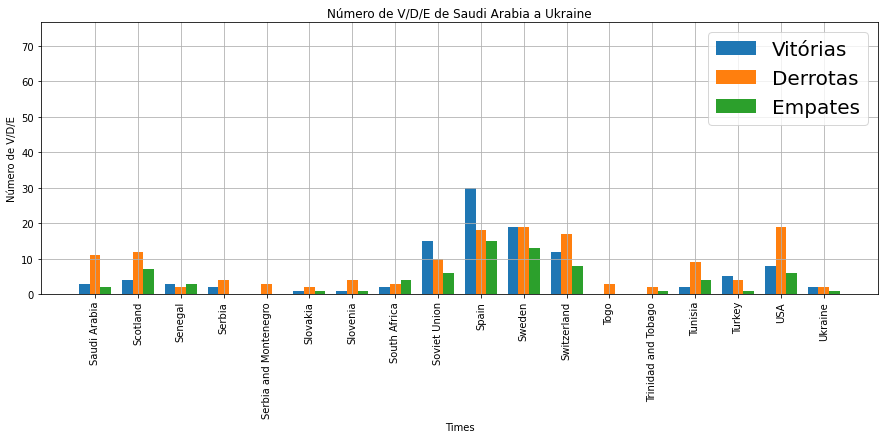

In [465]:
#parte 4 gráfico de vit/der/emp 
plt.figure(figsize=(15,5))
X_axis = np.arange(len(teams[60:78]))
plt.xticks(X_axis, teams[60:78], rotation = 90)
plt.xlabel('Times')
plt.ylabel('Número de V/D/E')
plt.title('Número de V/D/E de Saudi Arabia a Ukraine')
plt.bar(X_axis - 0.25, a[60:78], 0.25, label = 'Vitórias')
plt.bar(X_axis, b[60:78], 0.25, label = 'Derrotas')
plt.bar(X_axis + 0.25, c[60:78], 0.25, label = 'Empates')
plt.legend(prop={'size': 20})
plt.grid()
plt.ylim(btm, tp)

<BarContainer object of 21 artists>

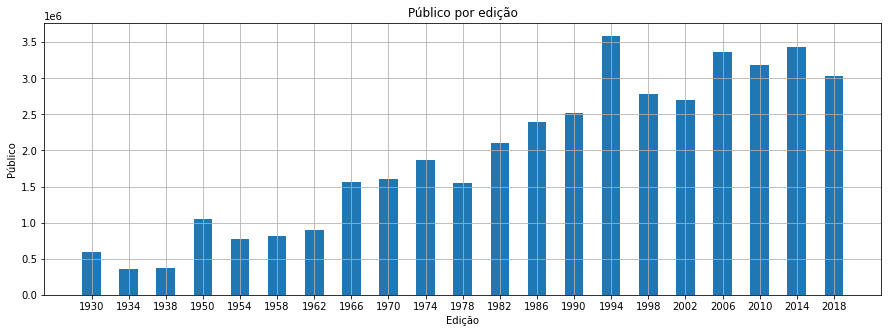

In [466]:
#grafico de publico

publico_por_ano = []
for ano in anos:
    publico_por_ano.append(sum(tabela['Attendance'][tabela['Year'] == ano]))

plt.figure(figsize=(15,5))
plt.grid()
plt.title('Público por edição')
plt.xlabel('Edição')
plt.ylabel('Público')
plt.bar([str(ano) for ano in anos], publico_por_ano, width = 0.5)

<BarContainer object of 21 artists>

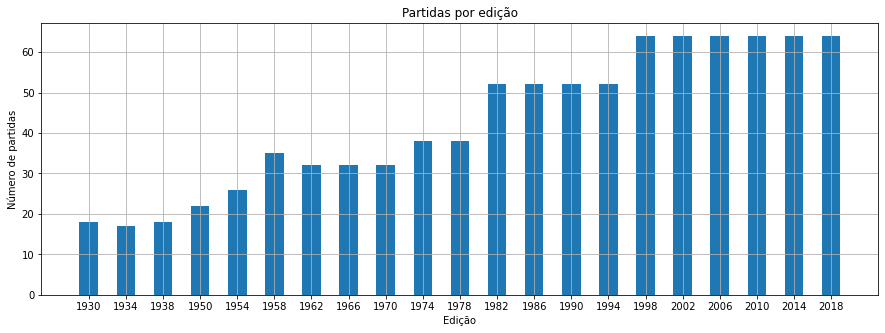

In [467]:
#grafico de num de partidas por edicao

plt.figure(figsize=(15,5))
plt.grid()
plt.title('Partidas por edição')
plt.xlabel('Edição')
plt.ylabel('Número de partidas')
plt.bar([str(ano) for ano in anos], n_partidas_edicao, width = 0.5)